# Análise Comparativa de Modelos

<div><h2>Visão Geral</h2></div>

Neste estudo, o objetivo é prever a eficiência do sono com base em diversas características relacionadas ao estilo de vida e saúde dos indivíduos. O conjunto de dados utilizado, intitulado **Sleep Efficiency** e presente na plataforma **[Kaggle](https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency/data)**, foi obtido para fins de análise exploratória e modelagem preditiva.

A metodologia adotada foi estruturada nas seguintes etapas: 

* **Obtenção de Dados**
* **Padronização de Variáveis**
* **Preparação dos Dados**
* **Modelagem Preditiva**

---

<div><h2>Metodologia</h2></div>

### Obtenção de Dados:

Nesta etapa, foi configurado o ambiente com a importação das bibliotecas do Python necessárias para preparação e modelagem, como *Pandas*, *Numpy*, *Scikit-Learn* e *Scipy*. Em seguida, o conjunto de dados **Sleep Efficiency** foi carregado, apresentada uma caracterização geral do conjunto e carregado o dicionário de dados. 

### Padronização de Variáveis:

Nesta etapa, realizou-se a padronização das variáveis do conjunto de dados. As variáveis categóricas foram convertidas para o tipo `category`. As variáveis de data e hora foram convertida para o tipo `datetime`, gerando novas variáveis. Os valores de consumo de álcool foram convertidos da unidade de medida onça (oz) para grama (g). Além disso, algumas colunas não relevantes para o modelo foram excluídas, e as demais foram renomeadas para o padrão `snake_case`.

### Preparação de Dados:

Esta etapa envolve a limpeza e transformação de dados necessárias para garantir que os dados estejam prontos para a modelagem. Isso inclui:

- **Tratamento de dados faltantes:** As colunas com valores faltantes foram tratadas utilizando o **Simple Imputer** do Scikit-Learn. Para as variáveis numéricas, os valores faltantes foram imputados utilizando a mediana. Já para as variáveis categóricas, como `Smoking Status`, foi utilizada a imputação de valores faltantes pela moda.

- **Tratamento de outliers**: Os outliers foram tratados utilizando o **Método de Capping** baseado no Intervalo Interquartil (IQR), que limita os valores dos dados dentro de intervalos definidos para evitar distorções. Esse método estabelece limites superior e inferior com base nos percentis especificados (por padrão, 5% e 95%) e ajusta os valores extremos para esses limites.

- **Codificação de variáveis:** As variáveis categóricas `Smoking Status` e `Gender` foram codificadas utilizando o **One-Hot Encoder** do Scikit-Learn, facilitando a aplicação em algoritmos de aprendizado de máquina.

- **Normalização de variáveis:** As variáveis numéricas foram identificadas e normalizadas utilizando o **Standard Scaler** do Scikit-Learn. O scaler foi aplicado para transformar as colunas selecionadas em uma escala comum, resultando em um conjunto de dados com valores normalizados.
    
### Modelagem Preditiva:

- **Regressão Linear**: Um modelo fundamental de regressão que ajusta uma linha reta aos dados para prever uma variável contínua. É simples e rápido, ideal para relações lineares entre variáveis.

- **Regressão Ridge**: Um modelo de regressão que incorpora um termo de regularização para controlar a magnitude dos coeficientes e evitar overfitting. É eficaz em cenários com multicolinearidade ou quando o número de variáveis é grande.

- **Regressão Lasso**: Um modelo de regressão que também inclui regularização, mas com a capacidade adicional de realizar seleção de variáveis ao forçar alguns coeficientes a zero. Isso ajuda a simplificar o modelo e melhorar a interpretabilidade.

- **Random Forest Regressor**: Um modelo avançado que combina múltiplas árvores de decisão em um ensemble para melhorar a precisão e reduzir o risco de overfitting. Ele é eficaz em dados com muitas variáveis e interações complexas, proporcionando robustez e alta capacidade de generalização.

#### Validação de Modelos

A validação cruzada com k-fold (k=5) foi usada para garantir resultados mais confiáveis e aplicáveis. Isso permite avaliar cada modelo em diferentes partes do conjunto de dados, evitando depender de apenas uma divisão específica dos dados.

**Este notebook é uma ferramenta prática para aprender e aplicar técnicas de machine learning em problemas relacionados à eficiência do sono. No final, queremos encontrar o melhor modelo para o conjunto de dados Sleep Efficiency e obter insights sobre como otimizar a saúde e o bem-estar com base em padrões de sono.**
    
--- 

<div><h2>Sumário</h2></div>

1. [Obtenção dos dados](#obtencao_dados)<br>
1.1. [Configuração do ambiente](#configuracao_ambiente)<br>
1.2. [Leitura do Conjunto de dados](#leitura_dados)<br>
1.3. [Dicionário de dados](#dicionario_dados)<br>
1.4. [Conjunto de dados](#conjunto_dados)<br>
1.5. [Dados faltantes ou nulos](#dados_faltantes)<br>
1.6. [Identificação e visualização de outliers](#outliers)<br>
2. [Padronização de variáveis](#padronizacao)<br>
2.1. [Conversão de variáveis categóricas](#dados_categoricos)<br>
2.2. [Conversão e separação de variáveis temporais](#dados_temporais)<br>
2.3. [Conversão de unidades: onça (oz) para grama (g)](#conversa_unidades)<br>
2.4. [Excluindo colunas desnecessárias](#excluir_colunas)<br>
2.5. [Renomeando colunas](#renomear_colunas)<br>
2.6. [Atualização do dicionário de dados](#dicionario_atualizado)<br>
3. [Preparação de dados](#preparacao_dados)<br>
3.1. [Preparação das variáveis para análise](#preparo_variaveis)<br>
3.2. [Variável alvo e variáveis preditoras](#variavel_alvo)<br>
3.3. [Tratamento de outliers](#tratamento_outliers)<br>
3.4. [Pipeline de pré-processamento de dados](#tratamento_dados)<br>
3.5. [Verificação de dados após o pré-processamento](#verificacao_dados)

---

<div id='descricao'><h2>1. Obtenção de dados</h2></div>

Nesta etapa, serão obtidos novamente os arquivos brutos de dados e o dicionário antes de iniciar a etapa de pré-processamento.

<div id='configuracao_ambiente'><h3>1.1. Configuração do ambiente</h3></div> 

In [28]:
# Importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

from IPython.display import display, Markdown
from IPython.display import HTML, display

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit, GridSearchCV, KFold, cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats

# Definindo a paleta de cores
colors = ["#BBD4D4","#A786A7","#74BDC1","#40596F"]
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

<div id='leitura_dados'><h3>1.2. Leitura do conjunto de dados</h3></div> 

In [29]:
# Apresentando o conjunto de dados
df = pd.read_csv('../data/raw/data.csv')
display(df.head())

# Exibição da descrição do conjunto de dados
display(Markdown(
    "O conjunto de dados, proveniente da plataforma Kaggle, contém informações sobre os padrões de sono de indivíduos," 
    "identificados por um **ID** único do indivíduo. " 
    "Inclui ainda dados sobre **idade**, **gênero**, **horário de dormir e acordar**, " 
    "**duração do sono**, **eficiência do sono**, **porcentagens de sono REM**, **profundo** e **leve**, "
    "**número de despertares**, **consumo de cafeína** e **álcool** antes de dormir, **status de fumante** "
    "e **frequência de exercícios**.\n\n"
    "---"
))

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


O conjunto de dados, proveniente da plataforma Kaggle, contém informações sobre os padrões de sono de indivíduos,identificados por um **ID** único do indivíduo. Inclui ainda dados sobre **idade**, **gênero**, **horário de dormir e acordar**, **duração do sono**, **eficiência do sono**, **porcentagens de sono REM**, **profundo** e **leve**, **número de despertares**, **consumo de cafeína** e **álcool** antes de dormir, **status de fumante** e **frequência de exercícios**.

---

<div id='dicionario_dados'><h3>1.3. Dicionário de dados</h3></div> 

In [30]:
# Dicionário de dados
df_dict = pd.read_csv('../data/external/dictionary.csv')
display(HTML(df_dict.to_html(index=False)))
display(Markdown(
    "---\n"
    "O dicionário de dados possui **15 variáveis**, sendo elas:\n" 
    "* **9** quatitativas discretas\n"
    "* **4** quantitativas contínuas\n" 
    "* **2** qualitativas nominais"
    "\n\n"
    "---"
))

variavel,descricao,tipo,subtipo
ID,Identificador único do indivíduo testado,quantitativa,discreta
Age,"Idade do indivíduo testado, em anos",quantitativa,discreta
Gender,Gênero do indivíduo testado,qualitativa,nominal
Bedtime,O horário em que o indivíduo testado vai para a cama todas as noites,quantitativa,contínua
Wakeup time,O horário em que o indivíduo testado acorda todas as manhãs,quantitativa,contínua
Sleep duration,Quantidade total de tempo em que o indivíduo testado dormiu (em horas),quantitativa,contínua
Sleep efficiency,Medida da proporção de tempo na cama gasto dormindo,quantitativa,contínua
REM sleep percentage,Percentual do tempo total gasto em sono REM,quantitativa,discreta
Deep sleep percentage,Percentual do tempo total gasto em sono profundo,quantitativa,discreta
Light sleep percentage,Percentual do tempo total gasto em sono leve,quantitativa,discreta


---
O dicionário de dados possui **15 variáveis**, sendo elas:
* **9** quatitativas discretas
* **4** quantitativas contínuas
* **2** qualitativas nominais

---

<div id='conjunto_dados'><h3>1.4. Conjunto de dados</h3></div> 

In [31]:
# Resumo das informações do conjunto de dados
display(Markdown("*Informações Gerais do Dataframe:* \n\n"))
df.info()
print("\n")

# Visualizando a estatística descritiva do conjunto de dados
display(Markdown("*<center>Estatística Descritiva</center>* \n\n"))
display(df.describe(include='all'))

*Informações Gerais do Dataframe:* 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

*<center>Estatística Descritiva</center>* 



,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
count,452.000000,452.000000,452,452,452,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,452,446.000000
unique,NaN,NaN,2,424,434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Male,2021-03-11 01:00:00,2021-11-25 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,NaN,NaN,228,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298,NaN
mean,226.500000,40.285398,NaN,NaN,NaN,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,NaN,1.791480
std,130.625419,13.172250,NaN,NaN,NaN,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,NaN,1.428134
min,1.000000,9.000000,NaN,NaN,NaN,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,113.750000,29.000000,NaN,NaN,NaN,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,NaN,0.000000
50%,226.500000,40.000000,NaN,NaN,NaN,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,NaN,2.000000
75%,339.250000,52.000000,NaN,NaN,NaN,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,NaN,3.000000


* O conjunto de dados possui **452 linhas** e **15 colunas**.

* Há 5 variáveis do tipo **integer**.

* Há 6 variáveis do tipo **float**.

* Há 4 variáveis classificadas como **object**, porém duas delas, `Gender` e `Smoking status`, são do tipo **string**, e as outras duas, `Bedtime` e `Wakeup time`, são do tipo **datetime**.

<div id='dados_faltantes'><h3>1.5. Dados faltantes ou nulos</h3></div> 

In [32]:
# Exibindo a soma de valores ausentes por coluna
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
display(Markdown("*Dados Faltantes ou Nulos:* \n\n"))
display(missing_values)  

display(Markdown(
    "---\n"    
    "Algumas colunas apresentam valores ausentes, como:\n"
    "* `Caffeine consumption:` **25** valores ausentes\n" 
    "* `Awakenings:` **20** valores ausentes\n"
    "* `Alcohol consumption:` **14** valores ausentes\n"
    "* `Exercise frequency:` **6** valores ausentes\n"
    "---"    
))

*Dados Faltantes ou Nulos:* 



Awakenings              20
Caffeine consumption    25
Alcohol consumption     14
Exercise frequency       6
dtype: int64

---
Algumas colunas apresentam valores ausentes, como:
* `Caffeine consumption:` **25** valores ausentes
* `Awakenings:` **20** valores ausentes
* `Alcohol consumption:` **14** valores ausentes
* `Exercise frequency:` **6** valores ausentes
---

<div id='outliers'><h3>1.6. Identificação e visualização de outliers</h3></div> 

*Número de Outliers por Coluna:* 


Deep sleep percentage     60
Sleep duration            16
Caffeine consumption       4
Light sleep percentage     2
dtype: int64

,Deep sleep percentage,Sleep duration,Caffeine consumption,Light sleep percentage
0,70,6.0,0.0,12
1,28,7.0,0.0,53
2,70,8.0,0.0,10
3,25,6.0,50.0,52
4,55,8.0,0.0,18


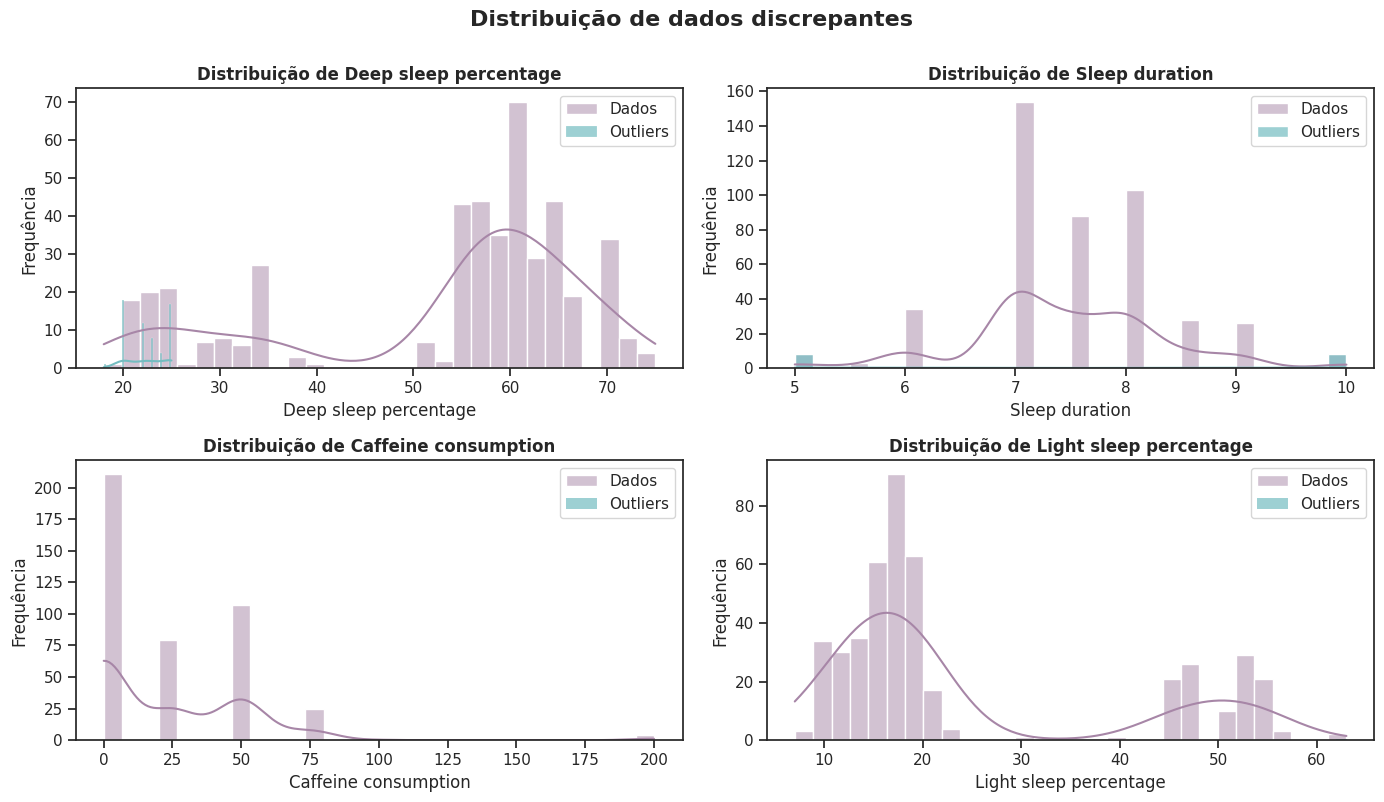

In [33]:
# Identificação de outliers usando o método do Intervalo Interquantil (IQR)
numeric_df = df.select_dtypes(include=[np.number])
factor = 1.5

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return (data < lower_bound) | (data > upper_bound)

# Aplicando a função a todas as colunas numéricas
outliers = numeric_df.apply(detect_outliers_iqr)

# Filtrando os dados para mostrar apenas os outliers
outliers_summary = outliers.sum().sort_values(ascending=False)
outliers_summary = outliers_summary[outliers_summary > 0]
outliers_data = numeric_df.loc[:, outliers_summary.index]
display(Markdown("*Número de Outliers por Coluna:* \n"))
display(outliers_summary)
print("\n")
display(outliers_data.head())
print("\n")

# Visualização gráfica
num_cols = outliers_data.shape[1]
num_rows = (num_cols + 1) // 2  # Calcula o número de linhas necessário
fig = plt.figure(figsize=(14, num_rows * 4))

fig.suptitle('Distribuição de dados discrepantes', fontweight='bold', fontsize=16, y=1)

for i, column in enumerate(outliers_data.columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(numeric_df[column], bins=30, kde=True, color=colors[1], label='Dados')
    sns.histplot(numeric_df[column][outliers[column]], bins=30, kde=True, color=colors[2], label='Outliers', alpha=0.7)
    plt.title(f'Distribuição de {column}', fontsize=12, fontweight='bold')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.legend()

plt.tight_layout()
plt.show()

* Foram detectados outliers nas colunas numéricas do conjunto de dados usando o Método do Intervalo Interquantil (IQR). 

* O cálculo do IQR revelou a presença de **82** outliers distribuídos entre as variáveis `Sleep duration`, `Deep sleep percentage`, `Light sleep percentage` e `Caffeine consumption`.

* A variável `Deep sleep percentage` possui o maior número de valores discrepantes, **60 ao todo**, seguido de `Sleep duration`, com **16**, `Caffeine consumption`, com **4**, e `Light sleep percentage`, com **2**.

* Esses outliers foram visualizados graficamente para identificar padrões e impactos nos dados.

---

<div id='padronizacao'><h2>2. Padronização de variáveis</h2></div>

<div id='dados_categoricos'><h3>2.1. Conversão de variáveis categóricas</h3></div> 

In [34]:
# Conversão De Variaveis Categóricas
df['Gender'] = df['Gender'].astype('category')
df['Smoking status'] = df['Smoking status'].astype('category')

display(Markdown("*Tipos dos dados após conversão:* \n\n"))
print(df.dtypes)

*Tipos dos dados após conversão:* 



ID                           int64
Age                          int64
Gender                    category
Bedtime                     object
Wakeup time                 object
Sleep duration             float64
Sleep efficiency           float64
REM sleep percentage         int64
Deep sleep percentage        int64
Light sleep percentage       int64
Awakenings                 float64
Caffeine consumption       float64
Alcohol consumption        float64
Smoking status            category
Exercise frequency         float64
dtype: object


* Conversão das colunas `Gender` e `Smoking status` do conjunto de dados do tipo de dado `object` para o tipo `category`, sendo este mais eficiente para variáveis categóricas com um número limitado de valores distintos. 

* Após a conversão, são apresentados os tipos de dado das colunas do conjunto de dados.

---

<div id='dados_temporais'><h3>2.2. Conversão e separação de variáveis temporais</h3></div> 

In [35]:
# Convertendo as colunas para datetime
df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%Y-%m-%d %H:%M:%S')
df['Wakeup time']= pd.to_datetime(df['Wakeup time'], format='%Y-%m-%d %H:%M:%S')

# Extraindo apenas a hora
df['bedtime_hour'] = df['Bedtime'].dt.hour
df['wakeup_hour']= df['Wakeup time'].dt.hour

# Aplicando a conversão cíclica
df['bedtime_hour_sin'] = np.sin(df['bedtime_hour'] * (2. * np.pi / 24))
df['bedtime_hour_cos'] = np.cos(df['bedtime_hour'] * (2. * np.pi / 24))

df['wakeup_hour_sin'] = np.sin(df['wakeup_hour'] * (2. * np.pi / 24))
df['wakeup_hour_cos'] = np.cos(df['wakeup_hour'] * (2. * np.pi / 24))

# Removendo as colunas originais de 'Bedtime' e 'Wakeup time', e também as colunas 'bedtime_hour' e 'wakeup_hour'
df = df.drop(columns=['Bedtime', 'Wakeup time', 'bedtime_hour', 'wakeup_hour'])

display(df.head())

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,bedtime_hour_sin,bedtime_hour_cos,wakeup_hour_sin,wakeup_hour_cos
0,1,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,0.258819,0.965926,0.965926,-0.258819
1,2,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,0.500000,0.866025,0.707107,-0.707107
2,3,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,-0.707107,0.707107,0.965926,0.258819
3,4,40,Female,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,0.500000,0.866025,0.866025,-0.500000
4,5,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,0.258819,0.965926,0.707107,-0.707107


* Conversão das colunas `Bedtime` e `Wakeup time` para o tipo **datetime**, extraindo somente as colunas de hora, tendo em vista que as datas se referem somente ao período do estudo de eficiência do sono, portanto, não sendo relevante para o modelo.  

* Extração das horas, gerando as colunas `bedtime_hour` e `wakeup_hour`.

* Conversão cíclica das variáveis `bedtime_hour` e `wakeup_hour` usando as funções seno e cosseno para mapear a natureza cíclica da hora.

* Por fim, as colunas originais `Bedtime` e `Wakeup time`, assim como, as colunas criadas `bedtime_hour` e `wakeup_hour` foram removidas do dataframe.

---

<div id='conversa_unidades'><h3>2.3. Conversão de unidades: onça (oz) para grama (g)</h3></div> 

In [36]:
# Conversão De Unidades
def oz_to_g(oz):
    return oz * 28.3495

# Aplicando a conversão na coluna 'Alcohol consumption'
df['alcohol_consumption_g'] = df['Alcohol consumption'].apply(oz_to_g).round(2)
df = df.drop(columns=['Alcohol consumption'])

display(df.head())

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Smoking status,Exercise frequency,bedtime_hour_sin,bedtime_hour_cos,wakeup_hour_sin,wakeup_hour_cos,alcohol_consumption_g
0,1,65,Female,6.0,0.88,18,70,12,0.0,0.0,Yes,3.0,0.258819,0.965926,0.965926,-0.258819,0.00
1,2,69,Male,7.0,0.66,19,28,53,3.0,0.0,Yes,3.0,0.500000,0.866025,0.707107,-0.707107,85.05
2,3,40,Female,8.0,0.89,20,70,10,1.0,0.0,No,3.0,-0.707107,0.707107,0.965926,0.258819,0.00
3,4,40,Female,6.0,0.51,23,25,52,3.0,50.0,Yes,1.0,0.500000,0.866025,0.866025,-0.500000,141.75
4,5,57,Male,8.0,0.76,27,55,18,3.0,0.0,No,3.0,0.258819,0.965926,0.707107,-0.707107,85.05


* Conversão da unidade onça (oz) para grama (g) para padronização e melhor precisão das unidades de medida. A conversão foi aplicada na coluna `Alcohol consumption` e o resultado armazenado em uma nova coluna: `alcohol_consumption_g`. 

* Em seguida, a coluna original `Alcohol consumption` foi removida.

---

<div id='excluir_colunas'><h3>2.4. Excluindo colunas desnecessárias</h3></div> 

In [37]:
# Exclusão da coluna 'ID' do conjunto de dados
df = df.drop(columns=['ID'])

# Exclusão das colunas 'ID', 'Bedtime' e 'Wakeup time' do dicionário de dados
variables_to_exclude = ['ID', 'Bedtime', 'Wakeup time']
df_dict = df_dict[~df_dict['variavel'].isin(variables_to_exclude)]

* Excluída a coluna `ID` do conjunto de dados. 

* Excluídas as colunas `ID`, `Bedtime` e `Wakeup time` do dicionário de dados.

* Tais colunas foram excluídas, tendo em vista que não serem determinantes para o modelo.


---

<div id='renomear_colunas'><h3>2.5. Renomeando colunas</h3></div> 

In [38]:
# Renomeando a coluna Caffeine consumption para incluir a unidade de medida em mg
df.rename(columns={
   'Caffeine consumption': 'caffeine_consumption_mg', 
}, inplace=True)

# Renomeando todas as colunas no padrão snake_case
df.columns = [col.replace(' ', '_').lower() for col in df.columns]

display(df.head())

,age,gender,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption_mg,smoking_status,exercise_frequency,bedtime_hour_sin,bedtime_hour_cos,wakeup_hour_sin,wakeup_hour_cos,alcohol_consumption_g
0,65,Female,6.0,0.88,18,70,12,0.0,0.0,Yes,3.0,0.258819,0.965926,0.965926,-0.258819,0.00
1,69,Male,7.0,0.66,19,28,53,3.0,0.0,Yes,3.0,0.500000,0.866025,0.707107,-0.707107,85.05
2,40,Female,8.0,0.89,20,70,10,1.0,0.0,No,3.0,-0.707107,0.707107,0.965926,0.258819,0.00
3,40,Female,6.0,0.51,23,25,52,3.0,50.0,Yes,1.0,0.500000,0.866025,0.866025,-0.500000,141.75
4,57,Male,8.0,0.76,27,55,18,3.0,0.0,No,3.0,0.258819,0.965926,0.707107,-0.707107,85.05


* Formatação das variáveis com espaços ou letras maiúsculas para o padrão **snake_case** do Python, caracterizado pelo uso de letras minúsculas e underline, a fim de padronizar o nome das variáveis.

---

<div id='dicionario_atualizado'><h3>2.6. Atualização do dicionário de dados</h3></div> 

* Por fim, foram atualizados os nomes das variáveis presentes no dicionário, assim como, inseridas novas colunas referentes aos dados convertidos das colunas `Bedtime` e `Wakeup time`.

In [39]:
# Criando as novas entradas para o dicionário de dados
new_columns = pd.DataFrame({
    'variavel': ['bedtime_hour_sin', 'bedtime_hour_cos', 'wakeup_hour_sin', 'wakeup_hour_cos'],
    'descricao': [
        'Seno da hora de ir para a cama (representação cíclica)',
        'Cosseno da hora de ir para a cama (representação cíclica)',
        'Seno da hora de acordar (representação cíclica)',
        'Cosseno da hora de acordar (representação cíclica)'
    ],
    'tipo': ['quantitativa', 'quantitativa', 'quantitativa', 'quantitativa'],
    'subtipo': ['contínua', 'contínua', 'contínua', 'contínua']
})

df_dict = pd.concat([df_dict, new_columns], ignore_index=True)

# Substituindo os nomes das variáveis no dicionário de dados
df_dict['variavel'] = df_dict['variavel'].str.replace(' ', '_').str.lower()

df_dict.replace({
      'caffeine_consumption': 'caffeine_consumption_mg', 
      'alcohol_consumption': 'alcohol_consumption_g',
}, inplace=True)

display(HTML(df_dict.to_html(index=False)))

display(Markdown(
    "---\n"
    "O dicionário de dados atualizado possui **16 variáveis**, sendo elas:\n" 
    "* **8** quatitativas discretas\n"
    "* **6** quantitativas contínuas\n" 
    "* **2** qualitativas nominais"
    "\n\n"
    "---"
))

variavel,descricao,tipo,subtipo
age,"Idade do indivíduo testado, em anos",quantitativa,discreta
gender,Gênero do indivíduo testado,qualitativa,nominal
sleep_duration,Quantidade total de tempo em que o indivíduo testado dormiu (em horas),quantitativa,contínua
sleep_efficiency,Medida da proporção de tempo na cama gasto dormindo,quantitativa,contínua
rem_sleep_percentage,Percentual do tempo total gasto em sono REM,quantitativa,discreta
deep_sleep_percentage,Percentual do tempo total gasto em sono profundo,quantitativa,discreta
light_sleep_percentage,Percentual do tempo total gasto em sono leve,quantitativa,discreta
awakenings,O número de vezes em que o indivíduo testado acorda durante a noite,quantitativa,discreta
caffeine_consumption_mg,A quantidade de cafeína consumida nas 24 horas anteriores a hora de dormir (em mg),quantitativa,discreta
alcohol_consumption_g,A quantidade de álcool consumido nas 24 horas anteriores a hora de dormir (em oz),quantitativa,discreta


---
O dicionário de dados atualizado possui **16 variáveis**, sendo elas:
* **8** quatitativas discretas
* **6** quantitativas contínuas
* **2** qualitativas nominais

---

<div id='preparacao_dados'><h2>3. Preparação de Dados</h2></div>

Nesta seção, serão realizadas a preparação de dados com a separação da variáveis alvo e variáveis preditoras, o tratamento de dados faltantes e discrepantes, a normalização e a codificação em um pipeline de pré-processamento de dados.

<div id='preparo_variaveis'><h3>3.1. Preparação das variáveis para análise</h3></div> 

In [40]:
# Variável alvo
target_column = 'sleep_efficiency'

# Variáveis Nominais
nominal_columns = (
    df_dict
    .query("subtipo == 'nominal' and variavel != @target_column")
    .variavel
    .to_list()
)

# Variáveis Discretas
discrete_columns = (
    df_dict
    .query("subtipo == 'discreta' and variavel != @target_column")
    .variavel
    .to_list()
)

# Variáveis Contínuas
continuous_columns = (
    df_dict
    .query("subtipo == 'contínua' and variavel != @target_column")
    .variavel
    .to_list()
)

display(Markdown(
    f"- **Variável alvo:** {target_column} \n\n"
    f"- **Variáveis qualitativas nominais:** {nominal_columns} \n"    
    f"- **Variáveis quantitativas discretas:** {discrete_columns} \n" 
    f"- **Variáveis quantitativas contínuas:** {continuous_columns} \n"
    "---"
))

# Isolando a variável alvo das variáveis preditoras

X = df.drop(columns=[target_column], axis=1)
y = df[target_column]

- **Variável alvo:** sleep_efficiency 

- **Variáveis qualitativas nominais:** ['gender', 'smoking_status'] 
- **Variáveis quantitativas discretas:** ['age', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings', 'caffeine_consumption_mg', 'alcohol_consumption_g', 'exercise_frequency'] 
- **Variáveis quantitativas contínuas:** ['sleep_duration', 'bedtime_hour_sin', 'bedtime_hour_cos', 'wakeup_hour_sin', 'wakeup_hour_cos'] 
---

<div id='tratamento_outliers'><h3>3.2. Tratamento de outliers</h3></div> 

In [41]:
# Tratamento de outliers pelo Método de Capping

# Classe para aplicar o Capping
class CappingOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, lower_percentile=5, upper_percentile=95):
        self.lower_percentile = lower_percentile
        self.upper_percentile = upper_percentile

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_capped = X.copy()
        for col in range(X_capped.shape[1]):
            lower_bound = np.percentile(X_capped[:, col], self.lower_percentile)
            upper_bound = np.percentile(X_capped[:, col], self.upper_percentile)
            X_capped[:, col] = np.clip(X_capped[:, col], lower_bound, upper_bound)
        return X_capped

* Para o tratamento de outliers, foi utilizado o **Método de Capping** (ou winsorizing). Esta técnica limita os valores extremos dos dados a intervalos definidos por percentis, tipicamente entre 5% e 95%. 

* Valores abaixo do limite inferior de 5% são substituídos por esse limite inferior, enquanto valores acima do limite superior de 95% são ajustados para o limite superior. Essa abordagem reduz a influência dos outliers nos modelos de machine learning e minimiza as distorções nos dados.

<div id='tratamento_dados'><h3>3.3. Pipeline de pré-processamento de dados</h3></div> 

In [42]:
# Tratamento de dados faltantes e discrepantes, codificação e normalização

# Pipeline para variáveis nominais
nominal_preprocessor = Pipeline([
    ('missing', SimpleImputer(strategy='most_frequent')), # Tratamento de dados faltantes
    ('encoding', OneHotEncoder(sparse_output=False, drop='first')), # Codificação de variáveis
])

# Pipeline para variáveis discretas
discrete_preprocessor = Pipeline([
    ('missing', SimpleImputer(strategy='median')), # Tratamento de dados faltantes
    ('capping', CappingOutliers()), # Tratamento de outliers
    ('normalization', StandardScaler()) # Normalização de dados 
])

# Pipeline para variáveis contínuas
continuous_preprocessor = Pipeline([
    ('missing', SimpleImputer(strategy='median')), # Tratamento de dados faltantes
    ('capping', CappingOutliers()), # Tratamento de outliers
    ('normalization', StandardScaler()) # Normalização de dados 
])

# Combinação dos pipelines em um ColumnTransformer
preprocessor = ColumnTransformer([
    ('nominal', nominal_preprocessor, nominal_columns),
    ('discrete', discrete_preprocessor, discrete_columns),
    ('continuous', continuous_preprocessor, continuous_columns),
])

In [43]:
# Aplicando o pipeline de pré-processamento aos dados X
X_transformed = preprocessor.fit_transform(X)
X_transformed.shape

(452, 15)

In [44]:
# Apresentando o pré-processamento dos dados X
display(X_transformed)

array([[ 0.        ,  1.        ,  1.66055508, ...,  0.66026388,
         0.72209977, -0.12175529],
       [ 1.        ,  1.        ,  1.66055508, ..., -0.33917349,
        -0.97132271, -1.13124595],
       [ 0.        ,  0.        , -0.02503885, ..., -1.92904877,
         0.72209977,  1.04390413],
       ...,
       [ 0.        ,  1.        , -0.02503885, ...,  0.66026388,
         0.72209977, -0.12175529],
       [ 1.        ,  0.        ,  0.37629304, ..., -1.92904877,
         0.06846309,  1.58701496],
       [ 1.        ,  0.        , -1.55010002, ..., -0.33917349,
        -2.32639794, -1.48911179]])

* **Pipeline de variáveis nominais:** Inclui a imputação de valores faltantes pela moda, codificação das variáveis com **One-Hot Encoder**. O método de **Dummy Encoding** é utilizado, excluindo a primeira categoria para evitar multicolinearidade. 

* **Pipeline de variáveis contínuas e discretas:** Inclui a imputação de valores faltantes pela mediana, o tratamento de outliers pelo **Método de Capping** e a normalização com o **Standard Scaler**. 

* **Combinação dos pipelines:** Ambos os pipelines foram combinados em um **ColumnTransformer**, que aplica o pré-processamento adequado a cada grupo de colunas pré-estabelecido.

<div id='verificacao_dados'><h3>3.4. Verificação de dados após o pré-processamento</h3></div> 

#### Verificação de dados faltantes ou nulos

In [45]:
# Verificando se ainda existem dados faltantes ou nulos após a etapa de pré-processamento
display(Markdown("*Número de dados faltantes após o pré-processamento:* \n"))
np.isnan(X_transformed).sum()

*Número de dados faltantes após o pré-processamento:* 


0

#### Verificação de outliers

In [46]:
# Verificando se ainda existem dados discrepantes após a etapa de pré-processamento
def detect_outliers(data, column_names, threshold=3):
    outliers_info = {}
    z_scores = np.abs(stats.zscore(data))
    for i, column_name in enumerate(column_names):
        outliers = (z_scores[:, i] > threshold)
        outliers_info[column_name] = np.sum(outliers)
    return outliers_info

# Lista dos nomes das colunas originais, incluindo as colunas contínuas e discretas
column_names = continuous_columns + discrete_columns

# Aplicando a detecção de outliers com Z-Score Ajustado
outliers = detect_outliers(X_transformed, column_names)

# Exibindo o número de outliers por coluna
display(Markdown("*Número de outliers após o pré-processamento:*\n"))
for column, count in outliers.items():
    print(f"{column}: {count}")

*Número de outliers após o pré-processamento:*


sleep_duration: 0
bedtime_hour_sin: 0
bedtime_hour_cos: 0
wakeup_hour_sin: 0
wakeup_hour_cos: 0
age: 0
rem_sleep_percentage: 0
deep_sleep_percentage: 0
light_sleep_percentage: 0
awakenings: 0
caffeine_consumption_mg: 0
alcohol_consumption_g: 0
exercise_frequency: 0


* Após a transformação, foi confirmada a ausência de dados faltantes, com a soma de valores `NaN` resultando em `0`.

* Por meio do método Z-score, foi observada também a ausência de valores discrepantes após a etapa de pré-processamento.

---

<div id='modelagem_preditiva'><h2> 4. Modelagem Preditiva</h2></div>

<div id='seleção_de_modelos'><h3>4.1. Seleção de Modelos</h3></div> 

Vamos realizar a avaliação de quatro modelos de aprendizado de máquina utilizando um processo de validação para identificar qual deles apresenta o melhor desempenho no conjunto de dados analisado em questão. Os modelos que serão analisados incluem:

**1. Regressão Linear:** Ajusta uma linha reta aos dados para prever uma variável contínua, ideal para relações lineares.

**2. Regressão Ridge:** Adiciona regularização para controlar a magnitude dos coeficientes, prevenindo overfitting em cenários com muitas variáveis.

**3. Regressão Lasso:** Inclui regularização e seleção de variáveis, simplificando o modelo ao forçar alguns coeficientes a zero.

**4. Random Forest Regressor:** Usa um conjunto de árvores de decisão para prever valores contínuos, melhorando a precisão e reduzindo o overfitting.

Para cada um desses modelos, experimentaremos diferentes conjuntos de hiperparâmetros, a fim de encontrar a configuração mais eficaz.

As métricas que utilizamos para avaliar a performance dos modelos foram:

**1. `mean_squared_error` (como `scoring`):** É uma métrica de avaliação para problemas de regressão que calcula o erro quadrático médio entre os valores reais e previstos. 

**2. `neg_mean_squared_error` (como parte de `metrics`):** É o erro quadrático médio, mas negado para ser usado em funções de otimização que esperam que valores maiores sejam melhores. 

**3. `r2` (como parte de `metrics`):** O coeficiente de determinação, que mede a proporção da variância nos dados dependentes que é previsível a partir das variáveis independentes. 

**4. `fit_time`:** é o tempo necessário para treinar um modelo em um conjunto de dados.

Essas métricas nos permitirão comparar os modelos de forma abrangente, identificando qual deles é mais adequado para o conjunto de dados em análise.

In [47]:
# Configurações do experimento

n_splits_comparative_analysis = 10
n_folds_grid_search = 5
test_size = 0.2
random_state = 42
# scoring = 'accuracy'
# metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scoring = make_scorer(mean_squared_error, greater_is_better=False)
metrics = ['neg_mean_squared_error', 'r2']

# Configurações dos modelos de regressão

models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Ridge Regression', Ridge(), {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    }),
    ('Lasso Regression', Lasso(), {
        'alpha': [0.01, 0.1, 1.0, 10.0]
    }),
    ('Random Forest Regressor', RandomForestRegressor(random_state=random_state), {
        'n_estimators': [10, 50, 100],
        'max_depth': [3, 6, 8],
    }),
]

Nessa parte configura-se o experimento de **aprendizagem de máquina** para avaliar modelos de regressão, definindo parâmetros para validação cruzada, métricas de erro e uma lista de modelos com hiperparâmetros para ajuste e avaliação.

In [48]:
# Análise de Desempenho de Modelos de Regressão com Busca em Grade e Validação Cruzada

results = pd.DataFrame({})
cross_validate_grid_search = KFold(n_splits=n_folds_grid_search)
cross_validate_comparative_analysis = ShuffleSplit(n_splits=n_splits_comparative_analysis, test_size=test_size, random_state=random_state)

for model_name, model_object, model_parameters in models:
    print(f"running {model_name}...")
    model_grid_search = GridSearchCV(
        estimator=model_object,
        param_grid=model_parameters,
        scoring=scoring,
        n_jobs=-1,
        cv=cross_validate_grid_search
    )
    approach = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model_grid_search)
    ])
    scores = cross_validate(
        estimator=approach,
        X=X,
        y=y,
        cv=cross_validate_comparative_analysis,
        n_jobs=-1,
        scoring=metrics
    )
    scores['model_name'] = [model_name] * n_splits_comparative_analysis  
    display(pd.DataFrame(scores).drop(columns=['model_name']).agg(['mean', 'std']))
    results = pd.concat([results, pd.DataFrame(scores)], ignore_index=True)

running Linear Regression...


,fit_time,score_time,test_neg_mean_squared_error,test_r2
mean,0.836448,0.211082,-0.003685,0.803391
std,0.203240,0.060242,0.000415,0.030598


running Ridge Regression...


,fit_time,score_time,test_neg_mean_squared_error,test_r2
mean,1.421759,0.265221,-0.003648,0.805381
std,0.112516,0.063767,0.000388,0.029406


running Lasso Regression...


,fit_time,score_time,test_neg_mean_squared_error,test_r2
mean,1.74940,0.304311,-0.004256,0.772643
std,0.35932,0.109461,0.000410,0.035300


running Random Forest Regressor...


,fit_time,score_time,test_neg_mean_squared_error,test_r2
mean,58.854953,0.263034,-0.002494,0.866401
std,4.925973,0.103567,0.000416,0.028522


* O Random Forest Regressor tem o maior tempo de treinamento médio (58.85 segundos), significativamente maior do que os outros modelos, indicando que é mais custoso em termos de tempo. O Lasso Regression e o Ridge Regression têm tempos de treinamento intermediários, enquanto a Linear Regression é a mais rápida.

* O tempo médio de avaliação é relativamente semelhante entre todos os modelos, com o Random Forest Regressor tendo um tempo de avaliação comparável aos modelos Ridge e Lasso Regression, e a Linear Regression sendo a mais rápida.

* O Random Forest Regressor apresenta o menor erro quadrático médio negativo, o que indica que ele tem o melhor desempenho preditivo, com menor diferença entre os valores reais e previstos. O Lasso Regression tem o maior erro, sugerindo um desempenho inferior.

* O Random Forest Regressor também tem o maior valor médio de R² (0.866), o que indica que ele explica a maior proporção da variância nos dados. Os outros modelos, especialmente o Lasso Regression, apresentam valores de R² menores, com o Lasso Regression tendo o menor.

In [49]:
# Destacar Melhores Resultados em Tabela de Desempenho de Modelos de Regressão

def highlight_best(s, props=''):
    if s.name[1] != 'std':
        if s.name[0].endswith('time'):
            return np.where(s == np.nanmin(s.values), props, '')
        return np.where(s == np.nanmax(s.values), props, '')

display(Markdown("### 4.2. Resultados gerais"))
(
    results
    .groupby('model_name')
    .agg(['mean', 'std']).T
    .style
    .apply(highlight_best, props='color:white;background-color:gray;font-weight: bold;', axis=1)
    .set_table_styles([{'selector': 'td', 'props': 'text-align: center;'}])
)

### 4.2. Resultados gerais

<div id='verificacao_dados'><h3>4.3. Persistência do Modelo</h3></div> 

In [51]:
# Obtêm-se o modelo e os parametros ganhadores

model_name, model_object, model_parameters  = [foo for foo in models if foo[0] == "Random Forest Regressor"][0] 

model_grid_search = GridSearchCV(
        estimator=model_object,
        param_grid=model_parameters,
        scoring=scoring,
        n_jobs=-1,
        cv=cross_validate_grid_search
    )

approach = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model_grid_search)
])

approach.fit(X, y) #Seleciona o approach

print(f"Hiper parâmetros do modelo: {approach.steps[1][1].best_params_}")

Hiper parâmetros do modelo: {'max_depth': 6, 'n_estimators': 10}
